<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  0%|          | 17/4500 [00:00<00:27, 162.56it/s]

MSE 96984022.85359317
r2 0.4602513182390666
Model Coefficient -1.0639301852935654
Model Intercept 1041650.940954153


100%|██████████| 4500/4500 [00:26<00:00, 172.75it/s]


,loan_id,account_id,date,amount,duration,payments,status,slope
454,6612,7907,970831,97392,12,8116.0,A,2.115064
18,6876,9236,931221,86616,12,7218.0,A,1.780508
107,6253,6148,941104,59760,24,2490.0,A,1.522994
276,5988,4851,960822,141648,24,5902.0,A,1.469493
290,6995,9814,960926,96168,12,8014.0,A,1.443873
...,...,...,...,...,...,...,...,...
572,6682,8225,980330,36204,12,3017.0,D,-1.540422
663,4967,37,981014,318480,60,5308.0,D,-2.462606
471,6239,6083,970928,360864,48,7518.0,D,-2.781967
635,5991,4858,980727,335184,48,6983.0,D,-3.254940


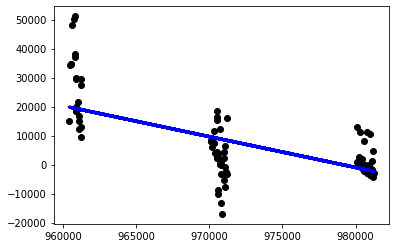

In [6]:
import pandas as pd 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

trans=pd.read_csv("https://midterm-ml.s3.ca-central-1.amazonaws.com/trans.csv", sep=";")
abcd =pd.read_csv("https://midterm-ml.s3.ca-central-1.amazonaws.com/loan.csv", sep=";")


#Visualize one case of account_id for an example together with simple train_train example
account=trans[trans['account_id']==2335] # account with the most money owed with Status D

X = account[['date']]
y = account['balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test.values, y_test.values, color='black');
plt.plot(X_test.values, y_pred, color='blue', linewidth=3);

print('MSE', mean_squared_error(y_test, y_pred))
print('r2', r2_score(y_test, y_pred)) 
#print('model score', model.score(X_test, y_test)) same thing with r2 as per Vinny
print('Model Coefficient', model.coef_[0])
print('Model Intercept',model.intercept_)

# Client 2335 made good progress to paid off the loan and still rated as D status

#Tabularize most cases possible (682 vs 4500 as account_id in loan table < trans table)slope={}; 
slope={}; 
for j in tqdm(trans['account_id'].unique()): 
    account=trans[trans['account_id']==j]
    X = account[['date']]
    y = account['balance']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    slope[j]=model.coef_[0]
#   NOT COVERED THIS TIME, NEED DOMAIN KNOWLEDGE
#   mse+=[mean_squared_error(y_test, y_pred)]
#   r2+=[r2_score(y_test, y_pred)]

#ADDING SLOPE PARAMETER INTO abcd table
abcd['slope'] = abcd['account_id'].map(slope)

#The table below shows complex Ratings : A accounts grew loan vs D accounts shrunk loan
#Perhaps A clients grew business, less risk. D clients piled cash from closed out sale? 
abcd.sort_values(['status', 'slope'], axis=0, ascending=[True, False])